In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Let's read the data...
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#..and create a new data frame in case we want later on
# to work with the initial dataframe
train = train_data.copy()
test = test_data.copy()

In [3]:
# From the data_exploration_house_prices notebook we know
# that 'GrLivArea' has high correlation with our target variable
# 'SalePrice'. So let's use it to build a simple linear regression model.
columns = ['GrLivArea', 'SalePrice']
# Creating a new dataframe which contains only the target variable and
# the selected predictor variable
play_dataset = pd.DataFrame(train, columns=columns)
# Checking correlation once again:
play_dataset['GrLivArea'].corr(play_dataset['SalePrice'])

0.7086244776126523

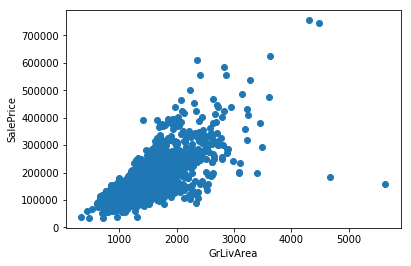

In [4]:
# Plotting the scatterplot of the two variables:
plt.scatter(play_dataset['GrLivArea'], play_dataset['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [5]:
# Let's select a small part of the dataset for educational purposes: 
small_dataset = play_dataset[:20]

In [6]:
# Correlation still relatively high:
small_dataset['GrLivArea'].corr(small_dataset['SalePrice'])

0.6769087401125173

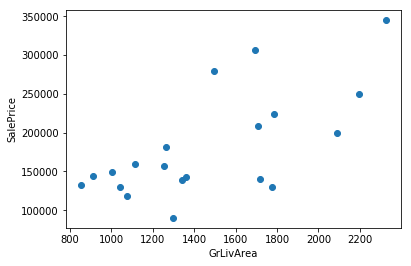

In [7]:
# Plotting the new scatterplot of the small dataset:
plt.scatter(small_dataset['GrLivArea'], small_dataset['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [8]:
# Lets fit a regression line to the above small dataset:
from sklearn.linear_model import LinearRegression

In [9]:
print(type(small_dataset['GrLivArea']))
print(type(small_dataset['SalePrice']))
X = small_dataset['GrLivArea'].values.reshape(-1, 1)
y = small_dataset['SalePrice'].values.reshape(-1, 1)
# We need to reshape here our variables because the fit method
# takes as input numpy arrays.
# If we had use  the train_test_split() function 
# which may take as input lists, numpy arrays, 
# scipy-sparse matrices or pandas dataframes 
# and returns numpy arrays we would be fine:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(type(X_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


In [10]:
# But let's not use train_test_split() and just use all the data to fit our
# linear model.
# We create the regressor lm which will apply the Ordinary least squares (OLS) 
# method in order to fit a linear regression line to our our small_dataset samples
lm = LinearRegression()
lm.fit(X, y)
# Printing the estimated coefficient for the X variable: 
print(lm.coef_)
# Printing the intercept of the model:
print(lm.intercept_)

[[107.15314929]]
[24290.63628644]


50


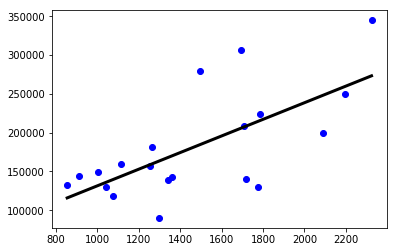

In [11]:
prediction_space = np.linspace(min(X), 
                               max(X)).reshape(-1, 1)
# Plotting the true samples
plt.scatter(X, y, color='blue')
# Ploting the regression line
# matplotlib.pyplot.plot: Plot y versus x as lines and/or markers.
# lm.predict uses the two attributes of lm.coef_ and lm.intercept_ 
# to come up with predicted y points. For a given number it gives back 
# a prediction. In the plot below we feed it with all points in the 
# interval min(X) to max(X) so it gives back 50 y points.
print(len(lm.predict(prediction_space)))
plt.plot(prediction_space, lm.predict(prediction_space), 
         color='black', linewidth=3) 
plt.show()

In [12]:
# Just manually checking how the predict method works 
print(round(lm.predict(5)))
print(round(24290.63628644 + 107.15314929 * 5))

24826.0
24826.0


In [13]:
# Let's see how the coefficient and the intercept 
# change if we feed all data to the regressor

In [14]:
X_all = train['GrLivArea'].values.reshape(-1, 1)
y_all = train['SalePrice'].values.reshape(-1, 1)
lm_all = LinearRegression()
lm_all.fit(X_all, y_all)
# Printing the estimated coefficient for the X variable: 
print(lm_all.coef_)
# Printing the intercept of the model:
print(lm_all.intercept_)

[[107.13035897]]
[18569.02585649]


50


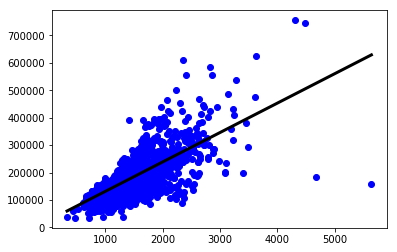

In [15]:
# The coefficient is pretty much the same regardless of
# the length of the dataset, but the intercept is quite 
# different
prediction_space_all = np.linspace(min(X_all), 
                               max(X_all)).reshape(-1, 1)
plt.scatter(X_all, y_all, color='blue')
print(len(lm_all.predict(prediction_space_all)))
plt.plot(prediction_space_all, lm.predict(prediction_space_all), 
         color='black', linewidth=3) 
plt.show()